Web Scraping with requests + BeautifulSoup

In [3]:
import requests
from bs4 import BeautifulSoup

# Step 1: Target the catalog page
catalog_url = 'https://catalog.data.gov/dataset/electric-vehicle-population-data'
response = requests.get(catalog_url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Find all links (inspect the structure of the site)
all_links = soup.find_all('a', href=True)

# Step 3: Search for links containing 'data.wa.gov'
for link in all_links:
    href = link['href']
    if 'data.wa.gov' in href and ('csv' in href or 'resource' in href):
        print(href)


https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD


Direct API or CSV download

In [4]:
import pandas as pd

# Direct CSV URL from data.wa.gov (API-like access)
csv_url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

# Download and load into DataFrame
df = pd.read_csv(csv_url)

# Preview the data
print(df.shape)
print(df.head())



(247344, 17)
   VIN (1-10)    County       City State  Postal Code  Model Year    Make  \
0  1N4BZ0CP5G      King    Seattle    WA      98125.0        2016  NISSAN   
1  KNDJX3AEXG      King     Renton    WA      98058.0        2016     KIA   
2  5YJ3E1EB2J      King    Seattle    WA      98115.0        2018   TESLA   
3  1C4RJXN64R    Kitsap  Bremerton    WA      98312.0        2024    JEEP   
4  5YJ3E1EB1J  Thurston    Olympia    WA      98512.0        2018   TESLA   

      Model                   Electric Vehicle Type  \
0      LEAF          Battery Electric Vehicle (BEV)   
1      SOUL          Battery Electric Vehicle (BEV)   
2   MODEL 3          Battery Electric Vehicle (BEV)   
3  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
4   MODEL 3          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            84.0   
1           Clean Alternative Fuel Vehicle Eligible

In [5]:
df.to_csv("electric_vehicle_population.csv", index=False)
print("Data saved to electric_vehicle_population.csv")


Data saved to electric_vehicle_population.csv


Data Cleaning and Exploratory Data Analysis (EDA)

In [6]:
df.describe()  # Get a summary of the dataset

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,247340.000000,247344.000000,247324.000000,247324.000000,246791.000000,2.473440e+05,2.473400e+05
mean,98180.773999,2021.572450,44.645659,740.206308,29.039924,2.382157e+08,5.297516e+10
std,2496.155753,3.014246,82.945315,6971.140984,14.857603,6.709585e+07,1.606887e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,18.000000,2.089133e+08,5.303301e+10
50%,98125.000000,2023.000000,0.000000,0.000000,33.000000,2.560989e+08,5.303303e+10
75%,98382.000000,2024.000000,37.000000,0.000000,42.000000,2.723745e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [7]:
df.info()  # Get information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247344 non-null  object 
 1   County                                             247340 non-null  object 
 2   City                                               247340 non-null  object 
 3   State                                              247344 non-null  object 
 4   Postal Code                                        247340 non-null  float64
 5   Model Year                                         247344 non-null  int64  
 6   Make                                               247344 non-null  object 
 7   Model                                              247344 non-null  object 
 8   Electric Vehicle Type                              247344 non-null  object

In [9]:
# Drop VIN and Census Tract if not needed
df.drop(columns=["VIN (1-10)", "2020 Census Tract"], inplace=True)


In [10]:
missing = df.isnull().sum()
print(missing[missing > 0])


County                    4
City                      4
Postal Code               4
Electric Range           20
Base MSRP                20
Legislative District    553
Vehicle Location         11
Electric Utility          4
dtype: int64


In [11]:
df.drop(columns=["Legislative District"], inplace=True)

In [13]:
# Example: fill missing electric range with mean
df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)

C:\Users\jahna\AppData\Local\Temp\ipykernel_4576\2881961684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)


In [14]:
df = df.dropna(subset=['County'])

In [15]:
# Count number of zeros in the 'scores' column
zero_count = (df['Base MSRP'] == 0).sum()

In [16]:
df.drop(columns=["Base MSRP"], inplace=True)

In [17]:
# Convert model year to int
df['Model Year'] = df['Model Year'].astype(int)

# Strip and standardize strings
df['Make'] = df['Make'].str.upper().str.strip()
df['County'] = df['County'].str.title().str.strip()


C:\Users\jahna\AppData\Local\Temp\ipykernel_4576\1175831828.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counties.index, y=top_counties.values, palette='Greens_d')


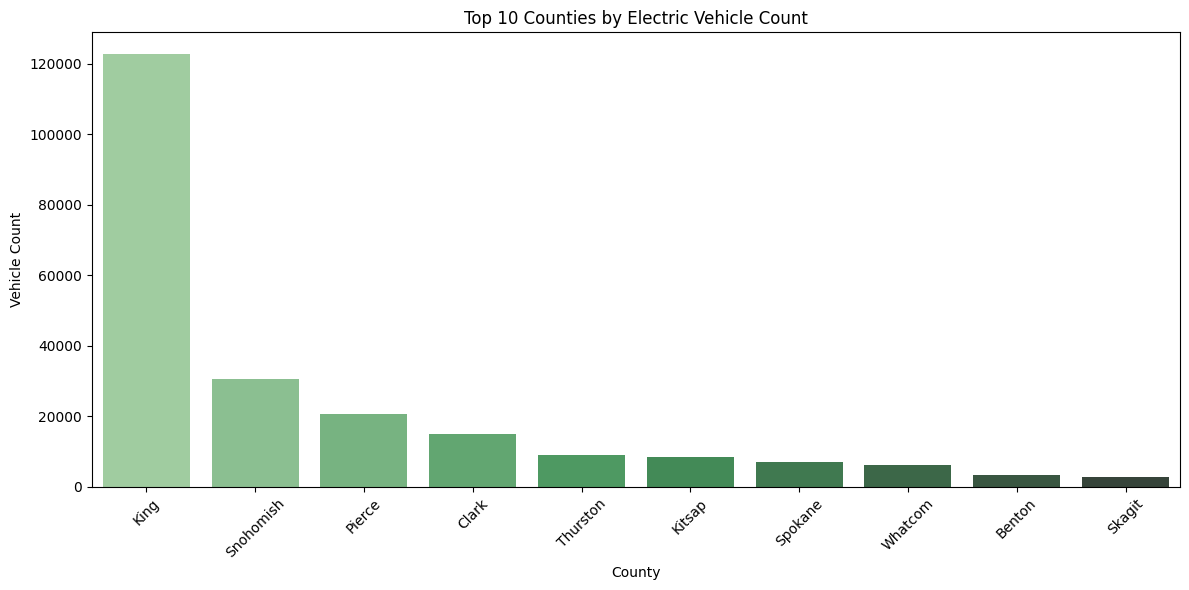

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_counties = df['County'].value_counts().nlargest(10)
sns.barplot(x=top_counties.index, y=top_counties.values, palette='Greens_d')
plt.title("Top 10 Counties by Electric Vehicle Count")
plt.ylabel("Vehicle Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\jahna\AppData\Local\Temp\ipykernel_4576\572987482.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index, palette='BuGn_r')


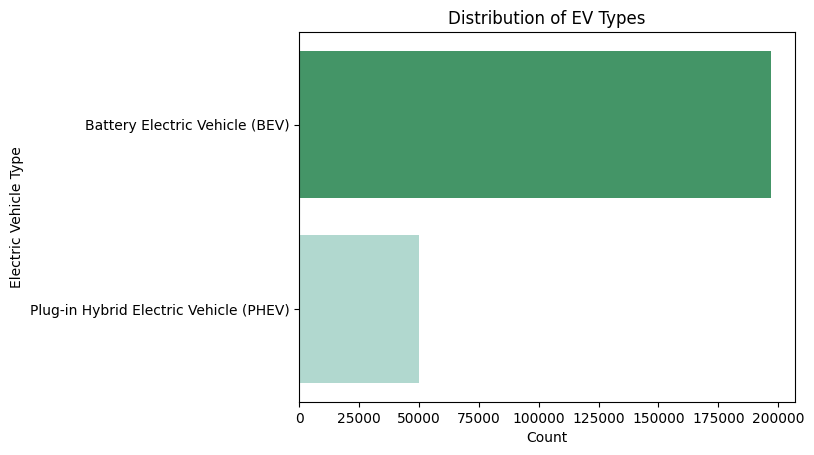

In [19]:
sns.countplot(data=df, y='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index, palette='BuGn_r')
plt.title("Distribution of EV Types")
plt.xlabel("Count")
plt.show()


In [20]:
df["Electric Vehicle Type"]=df["Electric Vehicle Type"].replace({
    "Battery Electric Vehicle (BEV)": "BEV",
    "Plug-in Hybrid Electric Vehicle (PHEV)": "PHEV"})

In [21]:
df.head(5)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,Vehicle Location,Electric Utility
0,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,84.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Renton,WA,98058.0,2016,KIA,SOUL,BEV,Clean Alternative Fuel Vehicle Eligible,93.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,215.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,PHEV,Not eligible due to low battery range,21.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC
4,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,215.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC


In [22]:
import numpy as np

# Create 3 conditions
cond1 = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Clean Alternative Fuel Vehicle Eligible"
cond2 = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Not eligible due to low battery range"
cond3 = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].str.contains("Eligibility unknown", case=False, na=False)

# Assign values based on conditions
df["CAFV_Eligibility_Binary"] = np.select([cond1, cond2, cond3], [1, 0, 0], default=np.nan)


In [23]:
df.drop(columns=["Electric Utility","Vehicle Location"], inplace=True)

In [24]:
df.to_csv("ev_data_cleaned.csv", index=False)
print("Cleaned data saved.")

Cleaned data saved.


In [25]:
df_1= pd.read_csv("electric_vehicle_population.csv")

In [26]:
print(df_1[['Base MSRP']].head())


   Base MSRP
0        0.0
1    31950.0
2        0.0
3        0.0
4        0.0


In [27]:
# Just to be safe — reset index
df.reset_index(drop=True, inplace=True)
df_1.reset_index(drop=True, inplace=True)

# Now add 'Base MSRP' column from original to cleaned
df['Base MSRP'] = df_1['Base MSRP']


In [28]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,DOL Vehicle ID,CAFV_Eligibility_Binary,Base MSRP
0,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,84.0,349455557,1.0,0.0
1,King,Renton,WA,98058.0,2016,KIA,SOUL,BEV,Clean Alternative Fuel Vehicle Eligible,93.0,210641315,1.0,31950.0
2,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,215.0,171417494,1.0,0.0
3,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,PHEV,Not eligible due to low battery range,21.0,262542927,0.0,0.0
4,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,215.0,110432815,1.0,0.0


Feature Engineering

In [29]:
# 1. Vehicle Age
df["Vehicle Age"] = 2025 - df["Model Year"]

# 2. Price Bracket
df["Price Category"] = pd.cut(df["Base MSRP"], bins=[-np.inf, 30000, 50000, 100000, np.inf],
                              labels=["Low", "Mid", "High", "Luxury"])

# 3. Top 10 Makes only
top_makes = df['Make'].value_counts().nlargest(10).index
df['Make_Top10'] = df['Make'].where(df['Make'].isin(top_makes), other='Other')


Final Dataset Prep for Modeling

In [30]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
cat_cols = ['Make_Top10', 'Model', 'Price Category',"Electric Vehicle Type"]
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247340 entries, 0 to 247339
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             247340 non-null  object 
 1   City                                               247340 non-null  object 
 2   State                                              247340 non-null  object 
 3   Postal Code                                        247340 non-null  float64
 4   Model Year                                         247340 non-null  int64  
 5   Make                                               247340 non-null  object 
 6   Model                                              247340 non-null  int64  
 7   Electric Vehicle Type                              247340 non-null  int64  
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  247340 non-null  object

Model Building

In [ ]:
from sklearn.model_selection import train_test_split

# Make sure you have your final features and target ready
features = ['Vehicle Age', 'Electric Range', 'Base MSRP', 'Make_Top10', 'Model',
            'Price Category', 'Electric Vehicle Type']
X = df[features]
y = df['CAFV_Eligibility_Binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.9999191396458317
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34564
         1.0       1.00      1.00      1.00     14904

    accuracy                           1.00     49468
   macro avg       1.00      1.00      1.00     49468
weighted avg       1.00      1.00      1.00     49468



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34564
         1.0       1.00      1.00      1.00     14904

    accuracy                           1.00     49468
   macro avg       1.00      1.00      1.00     49468
weighted avg       1.00      1.00      1.00     49468



Evaluate Performance

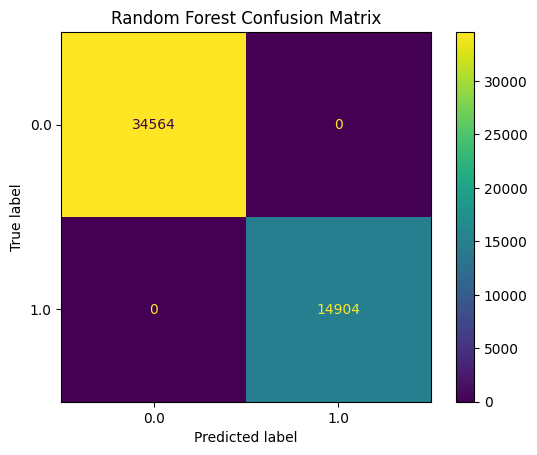

Random Forest AUC: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# AUC Score
print("Random Forest AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


In [ ]:
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)

C:\Users\jahna\AppData\Local\Temp\ipykernel_4064\1739236928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)


C:\Users\jahna\AppData\Local\Temp\ipykernel_4064\2586387288.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feat_names, palette="Greens_d")


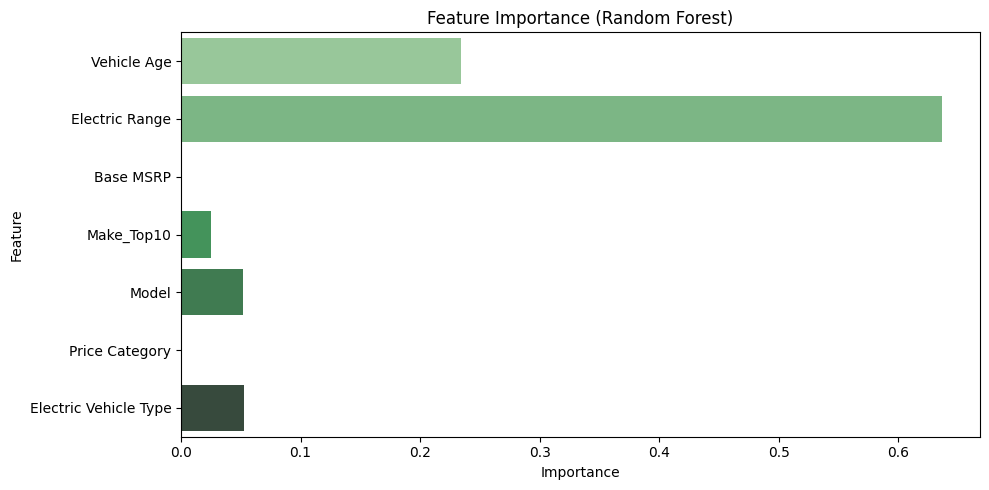

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feat_names = X.columns

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feat_names, palette="Greens_d")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


PIPELINE & AUTOMATION

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# ---- Predefine columns ----
numeric_features = ['Vehicle Age', 'Electric Range', 'Base MSRP']
categorical_features = ['Make_Top10', 'Model', 'Price Category', 'Electric Vehicle Type']
for col in categorical_features:
    df[col] = df[col].astype(str)

# ---- Split features and target ----
X = df[numeric_features + categorical_features]
y = df['CAFV_Eligibility_Binary']

# ---- Train/Test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---- Preprocessing pipelines ----
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ---- Final ML pipeline ----
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


Train the model

In [39]:
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Evaluate

In [40]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 1.0


Save and Reload the Model

In [41]:
import joblib

# Save model
joblib.dump(model, "cafv_eligibility_model.pkl")

# Load model (test in another cell later)
model_loaded = joblib.load("cafv_eligibility_model.pkl")
